Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2226 - accuracy: 0.9328 - val_loss: 0.1143 - val_accuracy: 0.9651
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1048 - accuracy: 0.9684 - val_loss: 0.0811 - val_accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0784 - accuracy: 0.9759 - val_loss: 0.0738 - val_accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0657 - accuracy: 0.9793 - val_loss: 0.0682 - val_accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0558 - accuracy: 0.9828 - val_loss: 0.0808 - val_accuracy: 0.9780
313/313 - 1s - loss: 0.0808 - accuracy: 0.9780 - 917ms/epoch - 3ms/step

Test accuracy: 0.9779999852180481


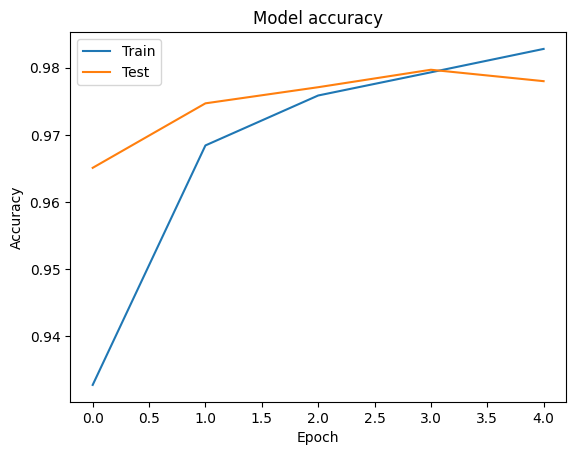

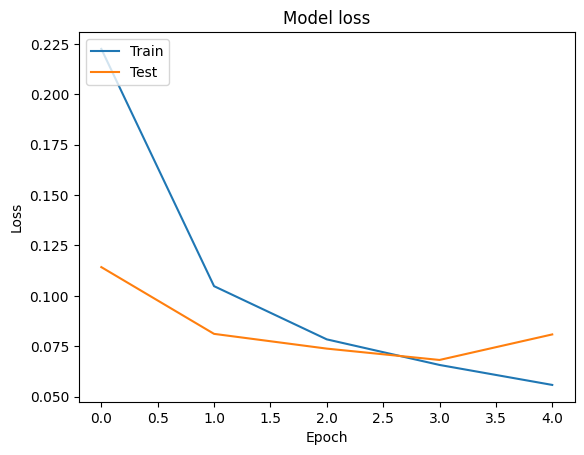

In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess Data
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape data to fit the model (28x28 flattened to 784)
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Step 3: Build the Neural Network Model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.2))  # Adding dropout to prevent overfitting
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))  # Adding dropout to prevent overfitting
model.add(layers.Dense(10, activation='softmax'))

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Step 7: Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Step 8: Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


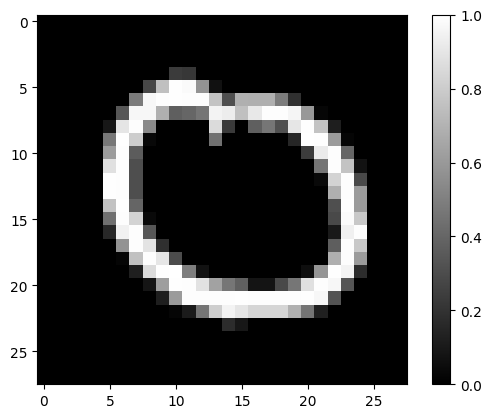

Label of the digit at index 10: 0


In [ ]:


# Step 3: Display the digit image at index 10
plt.figure()
plt.imshow(train_images[108], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

# Step 4: Print the label of the digit at index 10
print(f"Label of the digit at index 10: {train_labels[108]}")
